<a href="https://colab.research.google.com/github/LANCARI/MOD-711-Machine-Learning/blob/main/Clustering_K_Medians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOD-711 MACHINE LEARNING  (Grupo A Clustering)
## Clustering - K Medians

#### Integrantes:
- Frida Aduviri
- Licett Ancari


## 1. Descripción

K-Medians es un algoritmo de clustering que agrupa datos en clústeres utilizando la mediana como medida de tendencia central, lo que lo hace robusto ante valores atípicos en los datos.

Descripción paso a paso de cómo funciona el algoritmo K-Medians:

1. **Inicialización**: El proceso comienza seleccionando K centroides
iniciales de manera aleatoria o mediante algún método de inicialización, similar a K-Means.

2. **Asignación de puntos a clústeres:** Para cada punto en el conjunto de datos, se calcula la distancia entre ese punto y todos los centroides. El punto se asigna al clúster cuyo centroide tiene la distancia más pequeña.

3. **Actualización de centroides:** Después de asignar todos los puntos a clústeres, se recalcula el centroide de cada clúster utilizando la mediana de los puntos asignados a ese clúster. Esto significa que el nuevo centroide será el punto que minimiza la suma de las distancias medianas a todos los demás puntos del clúster.

4. **Repetición**: Los pasos 2 y 3 se repiten iterativamente hasta que se cumpla un criterio de convergencia, como la estabilización de los centroides o un número máximo de iteraciones.

5. **Resultado**: Una vez que el algoritmo ha convergido, obtendrás K clústeres, cada uno representado por su centroide mediano. Los puntos en cada clúster son los que tienen la mediana más cercana a ese centroide.

K-Medians tiene algunas ventajas sobre K-Means, especialmente cuando los datos contienen valores atípicos (outliers), ya que la mediana es menos sensible a valores extremos que la media. Sin embargo, K-Medians también puede ser más lento que K-Means en conjuntos de datos grandes debido a la necesidad de calcular medianas en lugar de promedios.


## 2. Birtex y Referencias:

* @article{paivinen2005clustering,
  title={Clustering with a minimum spanning tree of scale-free-like structure},
  author={P{\"a}ivinen, Niina},
  journal={Pattern Recognition Letters},
  volume={26},
  number={7},
  pages={921--930},
  year={2005},
  publisher={Elsevier}
}
* @inproceedings{jana2009efficient,
  title={An efficient minimum spanning tree based clustering algorithm},
  author={Jana, Prasanta K and Naik, Azad},
  booktitle={2009 Proceeding of International Conference on Methods and Models in Computer Science (ICM2CS)},
  pages={1--5},
  year={2009},
  organization={IEEE}
}
* https://www.kaggle.com/code/senpai24602/clustering
* DS Chen, KX Li y LB Zhao, Método de agrupamiento de árboles máximos de gráficos difusos y su aplicación, Oper. Res. Administrar. Ciencia. 16 (2007), 69–73.


## 3. Tipo de Modelo:

**Método de Aprendizaje:** No supervisado.

**Por Parámetro:**  No Paramétrico

**Datos de Aprendizaje:** Funciona en un enfoque "offline"

**Resultado del Entrenamiento:**  No es un modelo


## 4. Algoritmos de Entrenamiento:

* Medidas de distancia de SVNS
* Algoritmo de agrupamiento SVNMST
* Algoritmo de agrupamiento IFMST
* Algoritmo de agrupamiento difuso de MST


## 5. Supuestos y Restricciones:

Supuestos:

1. Conectividad de los datos: El algoritmo supone que los puntos de datos están ubicados en un espacio métrico y que se pueden conectar mediante aristas ponderadas, donde las ponderaciones representan alguna medida de similitud o distancia entre los puntos.

2. Estructura de clústeres basada en conectividad: El MST supone que los clústeres en los datos están relacionados con la estructura de conectividad. Esto significa que los puntos de datos en un mismo clúster están conectados de alguna manera, ya sea directamente o a través de otros puntos.

Restricciones:

1. Sensible a la métrica de distancia: El rendimiento del MST depende de la métrica de distancia utilizada para calcular las ponderaciones de las aristas. La elección de la métrica puede afectar la calidad de los clústeres identificados.

2. Dependencia de parámetros: El MST requiere la especificación de parámetros, como la métrica de distancia y, en algunos casos, una longitud de corte para determinar los clústeres. La elección de estos parámetros puede influir en los resultados y puede ser un proceso exploratorio.

3. Sensible a ruido y outliers: El MST puede ser sensible a ruido y valores atípicos en los datos. Puntos de datos que están aislados o que no siguen la estructura de conectividad pueden introducir clústeres espurios.

4. No garantiza el número óptimo de clústeres: El MST no proporciona una estimación automática del número óptimo de clústeres en los datos. Esto significa que el usuario debe determinar un criterio para cortar el árbol y dividirlo en clústeres.

5. Dependencia de la densidad: El MST tiende a agrupar puntos densos en clústeres, lo que significa que puede no ser adecuado para detectar clústeres de densidad variable o clústeres que no están necesariamente conectados por puntos densos.

# **Data Set: wine-clustering.csv**

Este conjunto de datos se ha adaptado del conjunto de datos de vinos eliminando la información sobre los tipos de vino para el aprendizaje no supervisado.

Las siguientes descripciones se han adaptado de la página web de UCI:

Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región en Italia, pero derivados de tres variedades de cultivos diferentes. El análisis determinó las cantidades de 13 componentes encontrados en cada uno de los tres tipos de vinos.

Los atributos son:
1. Alcohol (Alcohol)
2. Malic acid (Ácido málico)
3. Ash (Ceniza)
4. Alcalinity of ash (Alcalinidad de la ceniza)
5. Magnesium (Magnesio)
6. Total phenols (Fenoles totales)
7. Flavanoids (Flavonoides)
8. Nonflavanoid phenols (Fenoles no flavonoides)
9. Proanthocyanins (Proantocianidinas)
10. Color intensity (Intensidad del color)
11. Hue (Intensidad del color)
12. OD280/OD315 of diluted wines (OD280/OD315 de vinos diluidos)
13. Proline (Proline)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('wine-clustering.csv')
df.sample(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.9,1.09,2.88,1515
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.8,1.00,2.75,680


## Anális de DATOS:

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

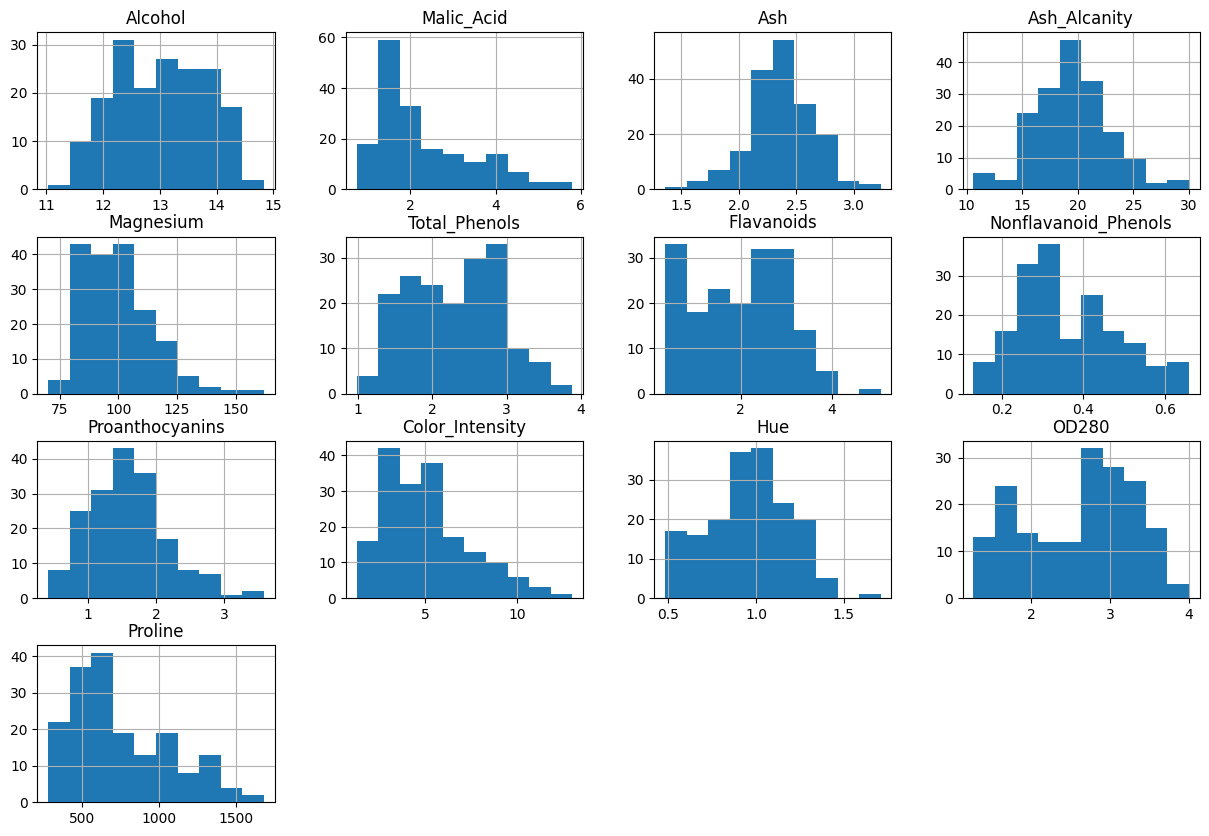

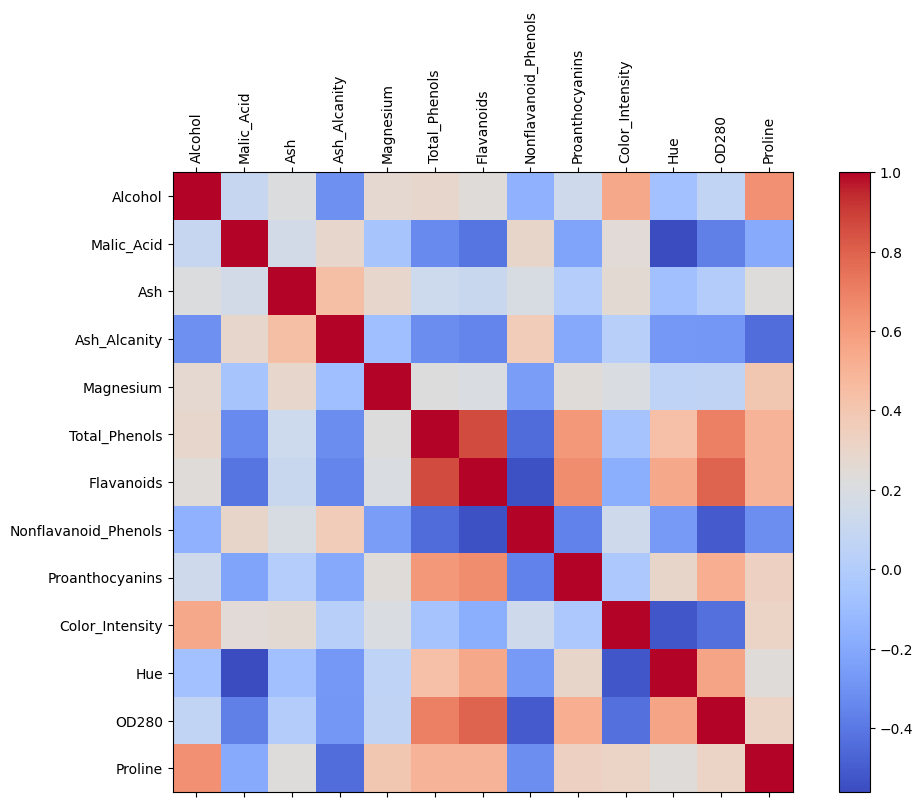

In [ ]:
# Resumen estadístico
print(df.describe())

# Histogramas para visualizar las distribuciones
df.hist(bins=10, figsize=(15, 10))
plt.show()

# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

## Aplicando Algoritmo

In [ ]:

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
X = df
X_train, X_test = train_test_split(X, test_size=0.7, random_state=0)


In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
labels_test = kmeans.predict(X_test)


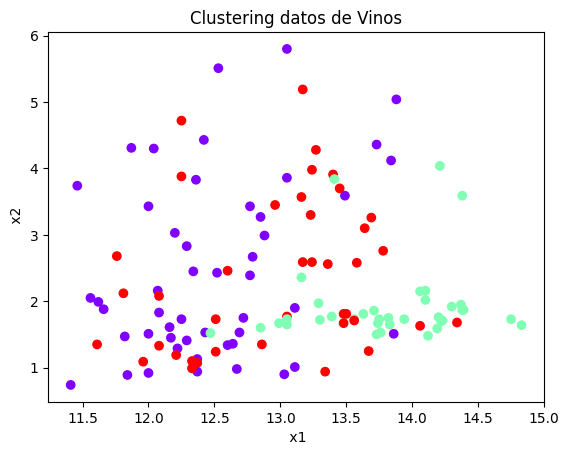

In [ ]:
# Graficar los datos de prueba con colores según las etiquetas de clúster
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=labels_test, cmap='rainbow')
plt.title("Clustering datos de Vinos")
plt.xlabel(" x1")
plt.ylabel(" x2")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X_test, labels_test)
print("Índice de Silueta:", silhouette_avg)

Índice de Silueta: 0.5940688285042565
